         NAME   V1 V2 V3   V4   V5 V6 V7 V8 V9 V10  V11  V12 V13 V14 V15  V16
0  republican    n  y  n    y    y  y  n  n  n   y  NaN    y   y   y   n    y
1  republican    n  y  n    y    y  y  n  n  n   n    n    y   y   y   n  NaN
2    democrat  NaN  y  y  NaN    y  y  n  n  n   n    y    n   y   y   n    n
3    democrat    n  y  y    n  NaN  y  n  n  n   n    y    n   y   n   n    y
4    democrat    y  y  y    n    y  y  n  n  n   n    y  NaN   y   y   y    y
NAME
democrat      0.613793
republican    0.386207
Name: proportion, dtype: float64
Matriz de Confusión:
[[35  6]
 [ 2 22]]
Reporte de clasificación:
              precision    recall  f1-score   support

    democrat       0.95      0.85      0.90        41
  republican       0.79      0.92      0.85        24

    accuracy                           0.88        65
   macro avg       0.87      0.89      0.87        65
weighted avg       0.89      0.88      0.88        65



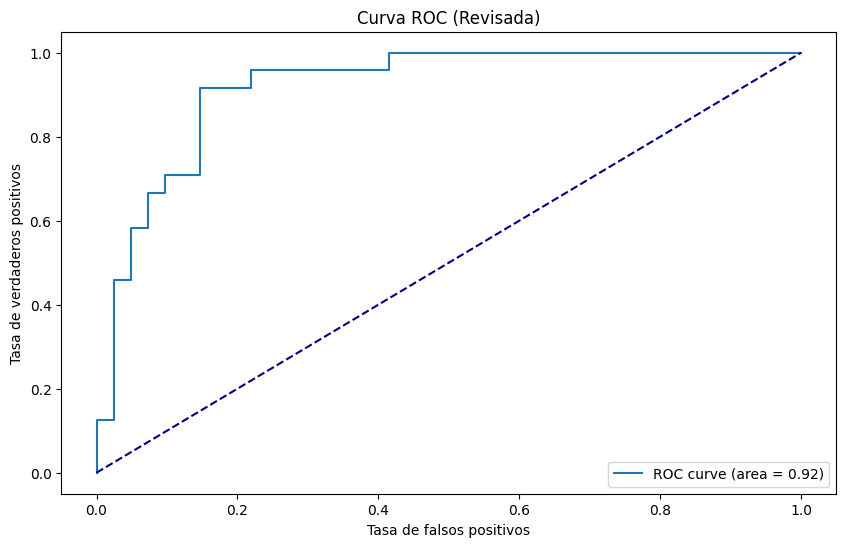

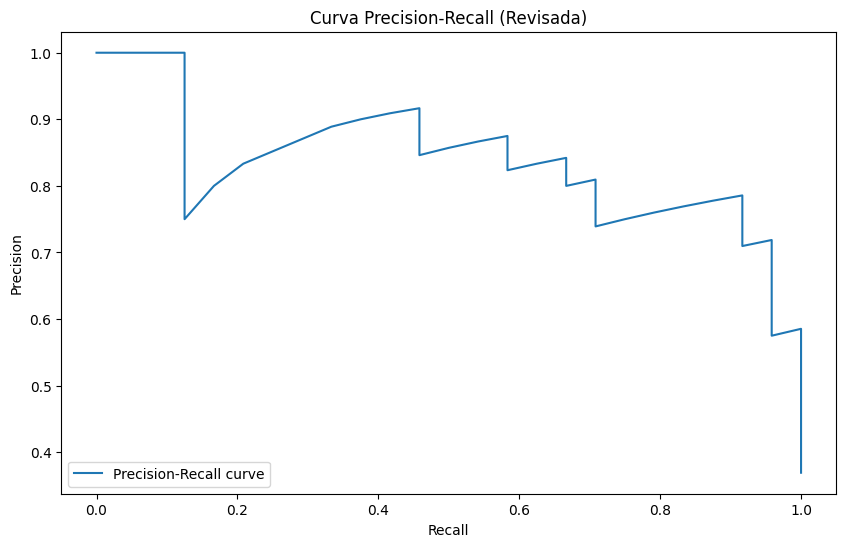

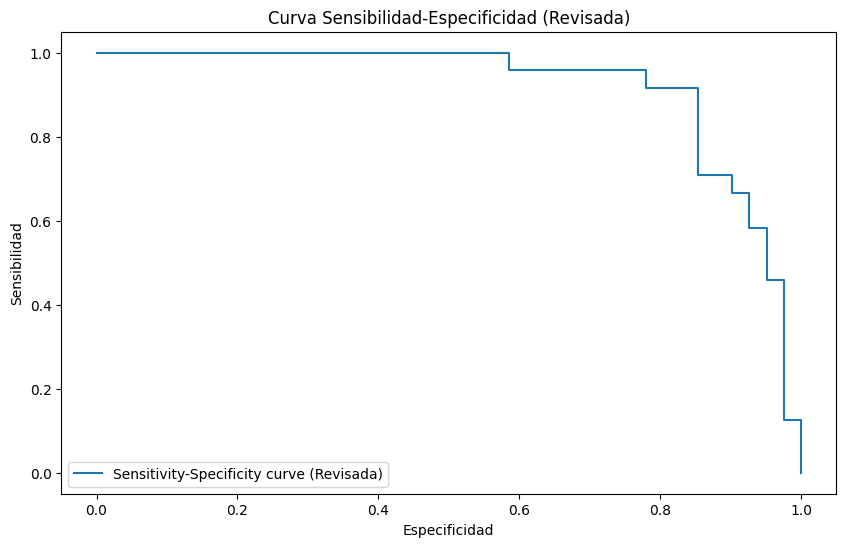

In [2]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
column_names = ["NAME", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16"]
vote_data = pd.read_csv("house-votes-84.data", header=None, names=column_names, na_values="?")

# Ver las primeras filas del dataset
print(vote_data.head())

# Convertir la columna 'NAME' a tipo categórico (Democrat/Republican)
vote_data["NAME"] = vote_data["NAME"].astype("category")

# Ver las proporciones de las clases
print(vote_data["NAME"].value_counts(normalize=True))

# Reemplazar los valores '?' por NaN
vote_data.replace("?", np.nan, inplace=True)

# Convertir las columnas de características (V1, V2, ...) a tipo numérico
label_encoder = LabelEncoder()

# Convertir cada columna a números
for col in vote_data.columns[1:]:
    vote_data[col] = label_encoder.fit_transform(vote_data[col])

# Dividir el dataset en entrenamiento y prueba
train_data = vote_data.iloc[:370]
test_data = vote_data.iloc[370:]

# Separar las características y la variable objetivo en los conjuntos de entrenamiento y prueba
X_train = train_data.drop(columns=["NAME"])
y_train = train_data["NAME"]
X_test = test_data.drop(columns=["NAME"])
y_test = test_data["NAME"]

# Entrenar el clasificador Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb_classifier.predict(X_test)

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular la precisión, recall y f1-score
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mapear las etiquetas para que republican sea la clase positiva (1) y democrat la negativa (0)
y_test_mapped = y_test.map({"democrat": 0, "republican": 1})

# Predicciones con probabilidades para la clase positiva (republican ahora es 1)
y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test_mapped, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc_score(y_test_mapped, y_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC (Revisada)")
plt.legend(loc="lower right")
plt.show()

# Curva Precision-Recall (basado en republican como clase positiva)
precision, recall, _ = precision_recall_curve(y_test_mapped, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall (Revisada)")
plt.legend(loc="lower left")
plt.show()

# Curva Sensibilidad-Especificidad (invertida si es necesario)
sens = tpr  # Tasa de verdaderos positivos (sensibilidad)
spec = 1 - fpr  # Tasa de falsos positivos (especificidad)
plt.figure(figsize=(10, 6))
plt.plot(spec, sens, label="Sensitivity-Specificity curve (Revisada)")
plt.xlabel("Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva Sensibilidad-Especificidad (Revisada)")
plt.legend(loc="lower left")
plt.show()
